In [665]:
# import the sympy package
import sympy as sym

# optional setup for "fancy" printing (used later)
# sym.init_printing()

# import additional functions for nice printing
from IPython.display import display, Math

import sympy as sym
import matplotlib.pyplot as pl
import numpy as np
from scipy.signal import find_peaks
from IPython.display import display,Math



In [151]:
x = sym.symbols('x')

# the function
def f(x):
    y= x**3
    return y

# limit
x0= 1.5
x=  sym.symbols('x')

limF= sym.limit(f(x), x, x0)

latexF= sym.latex(f(x))

sF= f'''
\\lim_{{ x \\to {x0} }}
【{latexF}】
=
{limF:.3f}
'''

sF

'\n\\lim_{ x \\to 1.5 }\n【x^{3}】\n=\n3.375\n'

In [152]:
Math(sF)

<IPython.core.display.Math object>

# in markdown language 

\lim_{ x \to 1.5 }【x^{3}】= 3.375

$$
\lim_{ x \to 1.5 }【x^{3}】= 3.375
$$


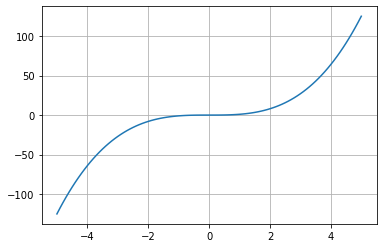

In [174]:
# evaluate the function in a range
xx=  np.linspace(-5, 5, 101)

#fxx= sym.lambdify(x, fx) # a function for evaluating a sympy function

# show it in a plot
plt.plot(xx,f(xx))
plt.grid()

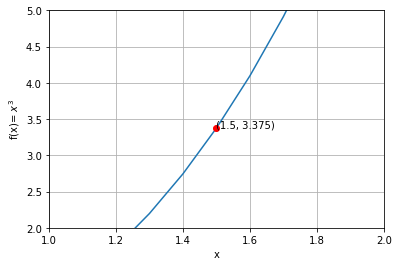

In [173]:
# make the plot look a bit nicer
plt.plot(xx, f(xx))

plt.plot(x0, limF,'ro')
plt.text(x0, limF,f'({x0}, {limF:.3f})')

plt.xlim([1,2])
plt.ylim([2,5])

plt.xlabel('x')

plt.ylabel(f'f(x)= ${latexF}$')

plt.grid()
plt.show()

In [186]:
# the function
#fx = (x**2)/(x-2)
#fxx = sym.lambdify(x,fx) # a function for evaluating a sympy function

def f(x):
    y= (x**2) / (x-2)
    return y

# limit

x=    sym.symbols('x')
x0=   2
limF= sym.limit(f(x), 
                x, 
                x0, 
                dir= '+')

latexF= sym.latex(f(x))

sF= f'''
\\lim_{{ x \\to {x0}^+}} 
{latexF} 
= 
{limF} 
'''
sF

'\n\\lim_{ x \\to 2^+} \n\\frac{x^{2}}{x - 2} \n= \noo \n'

In [187]:
Math(sF)

<IPython.core.display.Math object>

# in markdown 

$$
\lim_{ x \to 2^+} \frac{x^2}{x - 2} = \infty 
$$

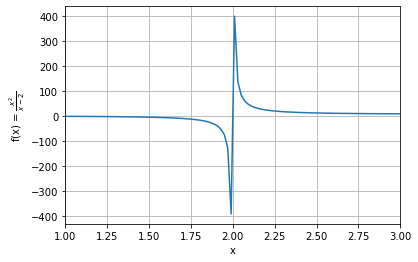

In [183]:

# show it in a plot

xx= np.linspace(1,3,100)
plt.plot(xx, f(xx))

# make the plot look a bit nicer
plt.plot(x0, limF, 'ro')
plt.xlim([1,3])
plt.xlabel('x')
plt.ylabel(f'f(x) = ${latexF}$')

plt.grid()
plt.show()

# Exercise


In [11]:
'''
fx = sym.sqrt(x+1)*sym.exp(-x)
gx = sym.cos(x + sym.sin(x))

## start by plotting the functions
fxx = sym.lambdify(x,fx)
gxx = sym.lambdify(x,gx)
'''


def f(x):
    y= sym.sqrt(x+1) * sym.exp(-x)
    return y

def g(x):
    y= sym.cos(x + sym.sin(x))
    return y

f_np= sym.lambdify(x, f(x)) #, 'numpy')
g_np= sym.lambdify(x, g(x)) #, 'numpy')

x=  sym.symbols('x')
xx= np.linspace(0,10,100)


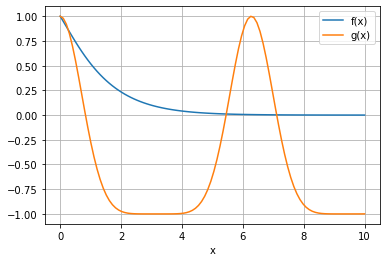

In [12]:
# show it in a plot
plt.plot(xx, f_np(xx), label= 'f(x)')
plt.plot(xx, g_np(xx), label= 'g(x)')
plt.xlabel('x')
plt.legend()
plt.grid()

In [13]:
# compute the limits separately at x=5

x0= 5
limF= sym.limit(f(x), x, x0)
limG= sym.limit(g(x), x, x0)

sF= f'''
\\frac
{{ \\lim_{{x \\to {x0} }} f(x) }}
{{ \\lim_{{x \\to {x0} }} g(x) }}
=
\\frac
{{ {limF} }}
{{ {limG} }}
=
\\frac
{{ {float(limF):.5f} }}
{{ {float(limG):.5f} }}
=
{{ {float(limF/limG):.5f} }}
'''

Math(sF)

<IPython.core.display.Math object>

In [14]:
sF0= f'''
\\frac
{{ \\lim_{{x \\to {x0} }} f(x) }}
{{ \\lim_{{x \\to {x0} }} g(x) }}
=
'''

sF1= f'''
\\frac
{{ {limF} }}
{{ {limG} }}
=
'''

sF2= f'''
\\frac
{{ {float(limF):.5f} }}
{{ {float(limG):.5f} }}
=
'''

sF3= f'''
{{ {float(limF/limG):.5f} }}
'''

display(Math(sF0))
display(Math(sF1))
display(Math(sF2))
display(Math(sF3))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

# VIDEO: Piece-wise functions


In [15]:
# list function pieces

from sympy.abc import x
x

x

In [8]:
x= sym.symbols('x')

f1= 0
f2= -2*x
f3= x**3/10

# put them together with conditions
fx= sym.Piecewise( 
    (f1, x < 0),
    (f2, (x>=0) & (x<3)),
    (f3, x>=3) )
fx

Piecewise((0, x < 0), (-2*x, x < 3), (x**3/10, True))

In [17]:
# evaluate the function in a range
fxx= sym.lambdify(x, fx)
fxx

f_np= sym.lambdify(x, fx, 'numpy')
f_np

<function _lambdifygenerated(x)>

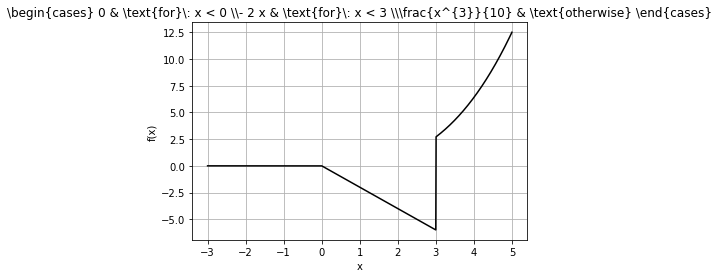

<IPython.core.display.Math object>

In [24]:
xx=  np.linspace(-3, 5, 1000)
yy= f_np(xx)

# show it in a plot
plt.plot(xx, yy, 'k')

# make the plot look a bit nicer
plt.xlabel('x')

plt.ylabel('f(x)')

latexF= sym.latex(fx)

plt.title(f'{latexF}')

plt.grid()
plt.show()

Math(latexF)

In [25]:
latexF

'\\begin{cases} 0 & \\text{for}\\: x < 0 \\\\- 2 x & \\text{for}\\: x < 3 \\\\\\frac{x^{3}}{10} & \\text{otherwise} \\end{cases}'

$
\begin{cases} 
0 & \text{for}\: x < 0     
\\
- 2 x & \text{for}\: x < 3 
\\
\frac{x^{3}}{10} & \text{otherwise} 
\end{cases}
$



In [45]:
def f(x):
    #y= sym.cos(x) * sym.exp(-x)
    y= sym.exp(-x**2)
    return y

x, y, z= sym.symbols('x, y, z')
f(x)

exp(-x**2)

In [48]:
ts= np.linspace(-3, 3,101)
fs= sym.lambdify(z, f(z))

In [257]:
import matplotlib.pyplot as pl
pl.plot(ts, fs(ts))
pl.grid()

NameError: name 'ts' is not defined

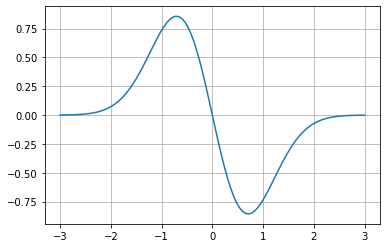

In [50]:
g= f(x).diff(x)

fs= sym.lambdify(x, g)
pl.plot(ts, fs(ts))
pl.grid()

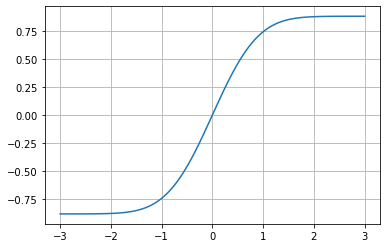

In [51]:
g= f(x).integrate(x)

fs= sym.lambdify(x, g)
pl.plot(ts, fs(ts))
pl.grid()

In [85]:
def f(x):
    y= sym.exp(-x**2)
    #y= sym.exp(-x**2/2)/sym.sqrt(2*sym.pi)
    return y

x=  sym.symbols('x')
ϕ=  f(x).diff(x)
Φ=  f(x).integrate((x,-sym.oo,x))



In [86]:
display(x)
display(f(x))
display(ϕ)
display(Φ)

x

exp(-x**2)

-2*x*exp(-x**2)

sqrt(pi)*erf(x)/2 + sqrt(pi)/2

In [87]:
xs= np.linspace(-5, 5, 101)
xs

f_np= sym.lambdify(x, f(x))
ϕ_np= sym.lambdify(x, f(x).diff(x))
Φ_np= sym.lambdify(x, f(x).integrate((x,-sym.oo,x)))


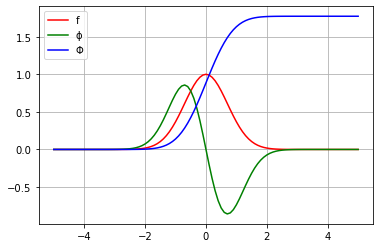

In [88]:
pl.plot(xs, f_np(xs), 'r')
pl.plot(xs, ϕ_np(xs), 'g')
pl.plot(xs, Φ_np(xs), 'b')
pl.legend(['f','ϕ','Φ'])
pl.grid()

In [89]:
f(x).integrate((x,-sym.oo, +sym.oo))

sqrt(pi)

In [93]:
x, y, t= sym.symbols('x, y, t')

f(t).integrate((t,-sym.oo, x))

sqrt(pi)*erf(x)/2 + sqrt(pi)/2

In [254]:
def f(x):
    y= sym.exp(-x**2/2)
    y= y/y.integrate((x,-sym.oo,+sym.oo))
    return y

def F(x):
    t= sym.symbols('t')
    y= f(t).integrate((t, -sym.oo, x))
    return y

x= sym.symbols('x')    
display(f(x))
display(F(x))

sqrt(2)*exp(-x**2/2)/(2*sqrt(pi))

erf(sqrt(2)*x/2)/2 + 1/2

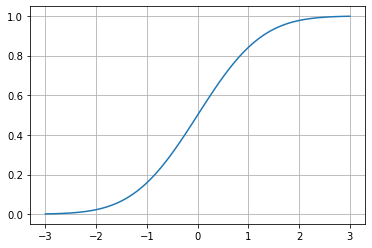

In [261]:
xs= np.linspace(-3,3,101)

f_np= sym.lambdify(x, F(x))
ys= f_np(xs)
pl.plot(xs,ys)
pl.grid()

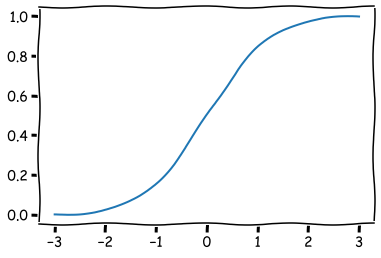

In [266]:
# show it in a plot
with pl.xkcd():
    pl.plot(xs,f_np(xs))
    pl.grid()



In [268]:
#pl.xkcd?

# VIDEO: Derivatives of polynomials


In [269]:
# Leibniz notation
display(Math('f(x) = %s, \\quad \\frac{df}{dx} = %s' %(sym.latex(fx),sym.latex(sym.diff(fx)))))

# Lagrange notation
display(Math('f(x) = %s, \\quad f\' = %s' %(sym.latex(fx),sym.latex(sym.diff(fx)))))

# Newton notation

display(Math('f(x) = %s, \\quad \\ddot{f} = %s' %(sym.latex(fx),sym.latex(sym.diff(sym.diff(fx))))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

# Leibniz notation

$$
f(x) =  \sqrt{x+1}  e^{-x}
\\
\frac{df}{dx} = - \sqrt{x + 1} e^{- x} + \frac{e^{- x}}{2 \sqrt{x + 1}}
$$

$$
f'(x)
$$

$$
\dot{f}(x)
$$

In [278]:
def f(x):
    y= sym.sqrt(x) * sym.exp(-x) / sym.pi
    return y

x=  sym.symbols('x')
sf= sym.latex(f(x))

print(sf)
display(sf)
Math(sf)

\frac{\sqrt{x} e^{- x}}{\pi}


'\\frac{\\sqrt{x} e^{- x}}{\\pi}'

<IPython.core.display.Math object>

In [280]:
markdownS= f'$${sf}$$'
print(markdownS)

$$\frac{\sqrt{x} e^{- x}}{\pi}$$


$$\frac{\sqrt{x} e^{- x}}{\pi}$$

In [282]:
x, n= sym.symbols('x, n')
f= x**n
f.diff(x).simplify()

n*x**(n - 1)

In [283]:
f= x**x
f.diff(x).simplify()

x**x*(log(x) + 1)

In [284]:
f= n**x
f.diff(x).simplify()

n**x*log(n)

In [290]:
f= sym.gamma(x)
f

gamma(x)

Text(0.5, 1.0, '$\\operatorname{erf}{\\left(x \\right)}$')

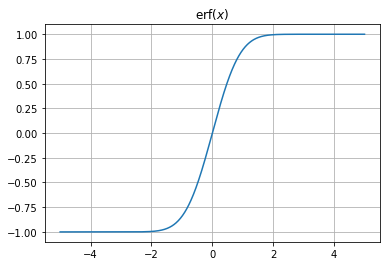

In [309]:
def f(s):
    f= sym.gamma(s)
    f= sym.erf(s)
    return f

x=  sym.symbols('x')

xs= np.linspace(-5, 5, 1001)

ys= sym.lambdify(
    x, 
    f(x)
    )(xs)

pl.plot(xs, ys)
pl.grid()
latexF= sym.latex(f(x))
pl.title(f'${latexF}$')

# sym.erf?

$
\mathrm{erf}(x) = 
\frac{2}{\sqrt{\pi}} 
\int_0^x e^{-t^2} \mathrm{d}t
$


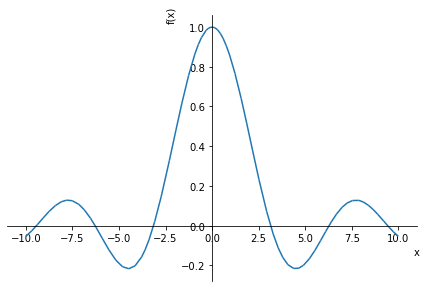

In [326]:
import sympy.plotting.plot as symplot

f= sym.sin(x) /x
symplot(f, (x,-10,10))


# VIDEO: Derivatives of trig functions
$
\frac{d}{dx} sin(x) =  cos(x) 
$

In [329]:
f= sym.sin(x)
g= f.diff(x)

display(f)
display(g)

sin(x)

cos(x)

In [333]:
f= sym.sin(x)

for i in range(4):
    display(Math('\\frac{d}{dx}%s = %s' %(sym.latex(f),sym.latex(sym.diff(f)))))
    f = sym.diff(f)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

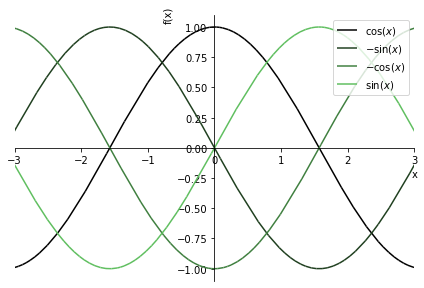

In [344]:
import sympy.plotting.plot as symplot

f = sym.cos(x)

for i in range(0,4):
    if i==0:
        p = symplot(f,show=False,line_color=(i/8,i/4,i/8),
                    label= f'${sym.latex(f)}$'
                   )
    else:
        p.extend( symplot(f,show=False,line_color=(i/8,i/4,i/8),
                          label= f'${sym.latex(f)}$'
                         ) )
    f = sym.diff(f)
    
p.legend = True
p.xlim = [-3,3]
p.show()

# VIDEO: Graphing a function tangent line

In [429]:
x= sym.symbols('x')

# define function and its derivative
f=  x**2
#f= sym.sin(x*2)
#f= sym.sqrt(4-x**2)


df= sym.diff(f)

In [430]:
# select x point
xa= 1

# define function and derivative values at that point
fa=    f.subs(x,xa)
df_a= df.subs(x,xa)

## evaluate function and its derivative
xx=     np.linspace(-2, 2, 101)
f_fun=  sym.lambdify(x, f)(xx)
df_fun= sym.lambdify(x,df)(xx)

# compute the tangent line
tanline= df_a * (xx - xa) + fa
#tanline

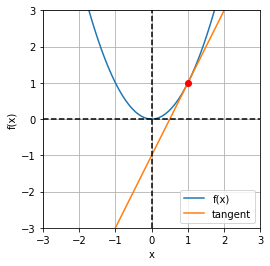

In [432]:
# plot it!
plt.plot(xx,f_fun,label='f(x)')
plt.plot(xx,tanline,label='tangent')
plt.plot(xa,fa,'ro')

plt.axis('square')
plt.axis([-3,3,-3,3])

ax= plt.gca()
plt.plot(ax.get_xlim(),[0,0],'k--')
plt.plot([0,0],ax.get_xlim(),'k--')

plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()

plt.grid()
plt.show()


# VIDEO: Finding critical points of a function


In [443]:
# The empirical method (useful for df=0; won't work for non-differentiable points)

# create a function
x= np.linspace(-5,5,1000) # vs 1001
fx= x**2 * np.exp(-x**2)

# extrema
localmax= find_peaks(fx)[0]
localmin= find_peaks(-fx)[0]

print('The critical points are ' + str(x[localmax]) + ' ' + str(x[localmin]))


The critical points are [-0.995996  0.995996] [-0.00500501]


In [442]:
display(find_peaks(fx))
display(find_peaks(-fx))

(array([400, 599], dtype=int64), {})

(array([499], dtype=int64), {})

The critical points are [-0.995996  0.995996] [-0.00500501]


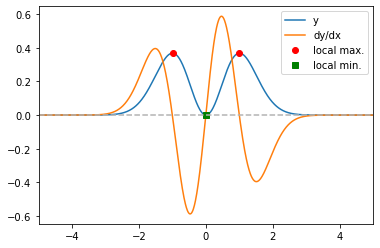

In [433]:
# compute its derivative
dfx = np.diff(fx)/np.mean(np.diff(x)) # scale by dx!

# plot everything
plt.plot(x,fx,label='y')
plt.plot(x[0:-1],dfx,label='dy/dx')
plt.plot(x[localmax],fx[localmax],'ro',label='local max.')
plt.plot(x[localmin],fx[localmin],'gs',label='local min.')
plt.plot(x[[0,-1]],[0,0],'--',c=[.7,.7,.7])

plt.legend()
plt.xlim(x[[0,-1]])
plt.show()

# The analytic (symbolic) method

In [444]:
x=  sym.symbols('x')
fx= x**2 * sym.exp(-x**2)

# derivative in sympy, solve
dfx=        sym.diff(fx, x)
critpoints= sym.solve(dfx)
print('The critical points are: ' + str(critpoints))


The critical points are: [-1, 0, 1]


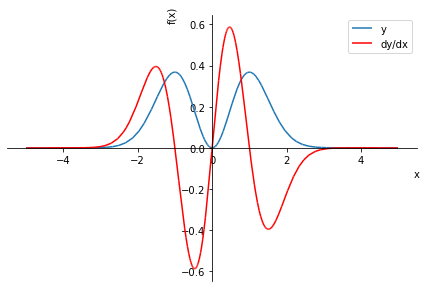

In [448]:
# some sympy plotting
p= sym.plot(fx,(x,-5,5),show=False)

p.extend(sym.plot(
         dfx,
         (x,-5,5),
         show=False,
         line_color='r'))

p[0].label= 'y'
p[1].label= 'dy/dx'
p.legend=    True

p.show()


### Exercise


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

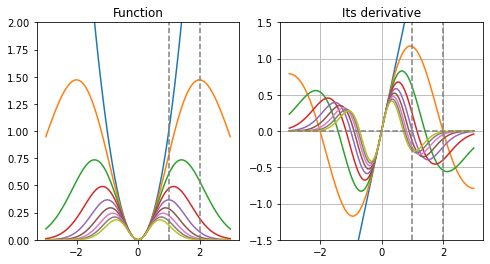

In [451]:
# what values of 'a' give this function a critical point at x=1 or x=2?
a,x = sym.symbols('a,x')

baseexpr = x**2 * sym.exp(-a*x**2)
arange = np.arange(0,2.25,.25)
xrange = np.linspace(-3,3,100)

# setup plots
fig,ax = plt.subplots(1,2)

for ai in arange:
    
    fx = baseexpr.subs(a,ai)
    dfx = sym.diff(fx)
    critpnts = sym.solve( dfx )
    
    # also plot the function in subplot1 and its derivative in subplot2
    ax[0].plot(xrange,sym.lambdify(x,fx)(xrange))
    ax[1].plot(xrange,sym.lambdify(x,dfx)(xrange))
    
    
    if 1 in critpnts:
        display(Math('\\Rightarrow %s\\text{ has a critical point at x=1! Woohoo!!}' %sym.latex(fx)))
    elif 2 in critpnts:
        display(Math('\\Rightarrow %s\\text{ has a critical point at x=2! Woohoo!!}' %sym.latex(fx)))
    else:
        display(Math('\\quad %s\\text{ has NO critical point at x=2. :(}' %sym.latex(fx)))



# some adjustments to the function plot
ax[0].set_ylim([0,2])
ax[0].set_title('Function')
ax[0].plot([1,1],[0,2],'--',c='gray')
ax[0].plot([2,2],[0,2],'--',c='gray')

# adjustments to the derivative plot
ax[1].set_ylim([-1.5,1.5])
ax[1].plot(xrange[[0,-1]],[0,0],'--',c='gray')
ax[1].plot([1,1],[-1.5,1.5],'--',c='gray')
ax[1].plot([2,2],[-1.5,1.5],'--',c='gray')
# ax[1].set_xlim([.5,2.5])
ax[1].set_title('Its derivative')
fig.set_size_inches(8,4)

plt.grid()
plt.show()


<function __main__.f(x)>

In [544]:
def f(x):
    '''
    多項式函數
    '''
    #y= 1 + x + x**2
    y= sym.sin(x)
    return y

x, y, z, s, t, u, v= sym.symbols(
    'x, y, z, s, t, u, v')

f_t= f(t)
f_s= f(s)
f_x= f(x)


q= f"""
f(x)= {
    sym.latex(
        f(x)
        )}
\\\\
f'(x)= {
    sym.latex(
        f(x).diff(x)
        )}
\\\\
f''(x)= {
    sym.latex(
        f(x).diff(x).diff(x)
        )}
\\\\
f'''(x)= {
    sym.latex(
        f(x).diff(x).diff(x).diff(x)
        )}
\\\\
f''''(x)= {
    sym.latex(
        f(x).diff(x).diff(x).diff(x).diff(x)
        )}
"""

Math(q)





<IPython.core.display.Math object>

In [564]:
fx= f(x)
q= f""
for i in range(9):
    if i>0:
        fx= fx.diff(x)
    lfx= sym.latex(fx)
    q += f"""f^{{({i})}}(x)= 
             {lfx}\\\\
             """
    
print(q)
Math(q)    


f^{(0)}(x)= 
             \sin{\left(x \right)}\\
             f^{(1)}(x)= 
             \cos{\left(x \right)}\\
             f^{(2)}(x)= 
             - \sin{\left(x \right)}\\
             f^{(3)}(x)= 
             - \cos{\left(x \right)}\\
             f^{(4)}(x)= 
             \sin{\left(x \right)}\\
             f^{(5)}(x)= 
             \cos{\left(x \right)}\\
             f^{(6)}(x)= 
             - \sin{\left(x \right)}\\
             f^{(7)}(x)= 
             - \cos{\left(x \right)}\\
             f^{(8)}(x)= 
             \sin{\left(x \right)}\\
             


<IPython.core.display.Math object>

$
f^{(0)}(x)= 
             \sin{\left(x \right)}\\
             f^{(1)}(x)= 
             \cos{\left(x \right)}\\
             f^{(2)}(x)= 
             - \sin{\left(x \right)}\\
             f^{(3)}(x)= 
             - \cos{\left(x \right)}\\
             f^{(4)}(x)= 
             \sin{\left(x \right)}\\
             f^{(5)}(x)= 
             \cos{\left(x \right)}\\
             f^{(6)}(x)= 
             - \sin{\left(x \right)}\\
             f^{(7)}(x)= 
             - \cos{\left(x \right)}\\
             f^{(8)}(x)= 
             \sin{\left(x \right)}\\
$

In [588]:
def f(x,y):
    
    #z= x**2 + x*y**2
    
    #z= sym.exp(x*y) * sym.sin(x*y)
    
    z= x**y
    
    return z


fxy=      f(x,y)
df_dx=    f(x,y).diff(x)
df_dy=    f(x,y).diff(y)
df_dx_dy= f(x,y).diff(x).diff(y)
df_dy_dx= f(x,y).diff(y).diff(x)

fxy=      sym.latex(fxy)
df_dx=    sym.latex(df_dx)
df_dy=    sym.latex(df_dy)
df_dx_dy= sym.latex(df_dx_dy)
df_dy_dx= sym.latex(df_dy_dx)


lx= '''
f(x,y) = %s

\\\\

\\frac
{\\partial f}
{\\partial x} = %s

\\\\

\\frac
{\\partial f}
{\\partial y} = %s
'''%(
fxy, 
df_dx,
df_dy
)

Math(lx)

<IPython.core.display.Math object>

In [593]:
lx= f'''
f(x,y) 
= {fxy}

\\\\

\\frac
{{\\partial f}}
{{\\partial x}} 
= {df_dx}

\\\\

\\frac
{{\\partial f}}
{{\\partial y}} 
= {df_dy}

\\\\

\\frac
{{\\partial^{{2}} f}}
{{\\partial x \\partial y}} 
= {df_dx_dy}

\\\\

\\frac
{{\\partial^{{2}} f}}
{{\\partial y \\partial x}} 
= {df_dy_dx}
'''

Math(lx)

<IPython.core.display.Math object>

In [582]:
print(lx)


f(x,y) = x^{2} + x y^{2}

\\

\frac
{\partial f}
{\partial x} = 2 x + y^{2}

\\

\frac
{\partial f}
{\partial y} = 2 x y



# markdown

$
f(x,y) = x^{2} + x y^{2}
\\
\frac{\partial f}{\partial x} = 2 x + y^{2}
\\
\frac{\partial f}{\partial y} = 2 x y
$

$$
f(x,y) = x^{2} + x y^{2}
\\
\frac
{\partial f}
{\partial x} = 2 x + y^{2}
\\
\frac
{\partial f}
{\partial y} = 2 x y
$$

# VIDEO: Indefinite and definite integrals


In [594]:
x= sym.symbols('x')

# a simple function
f= x

# indefinite integration
sym.integrate(f) # notice no constant term


x**2/2

In [595]:
# definite integation (within bounds)
sym.integrate(f,(x,0,1))


1/2

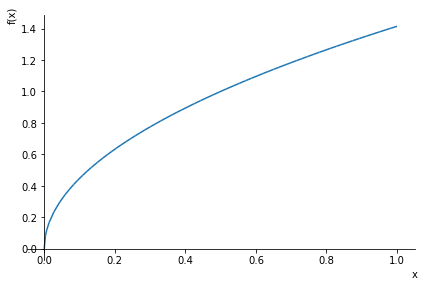

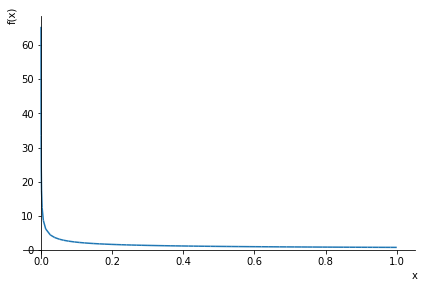

In [661]:
def f(x):
    y= sym.sin(2*x) * sym.exp(-3*x)
    y= x**3 * sym.exp(-x)
    return y

f(t)

t**3*exp(-t)

In [664]:
f(s).diff(s).diff(s).diff(s)

-s**3*exp(-s) + 9*s**2*exp(-s) - 18*s*exp(-s) + 6*exp(-s)

In [659]:

f(t) == f(t).diff(t).integrate(t)

True

In [656]:
f(s) == f(s).integrate(s).diff(s)

True

In [657]:
f(s).integrate(s)

-3*exp(-3*s)*sin(2*s)/13 - 2*exp(-3*s)*cos(2*s)/13

In [658]:
f(t).diff(t)

-3*exp(-3*t)*sin(2*t) + 2*exp(-3*t)*cos(2*t)

In [212]:

f(x)}} 
{{ \\lim_{{ x \\to {x0}  {g(x)} = \\frac{%g}{%g} = %g' \
             %(x0, x0, limF, limG, limF/limG)
'''

display(Math(sF))

<IPython.core.display.Math object>

In [243]:
# now compute limit of fx/gx
lim_F_G= sym.limit(f(x)/g(x), x, x0)

sF0= f'''
\\lim_{{ x \\to {x0} }}
\\frac{{f(x}} {{g(x)}}
=
'''

sF1= f'''
{float(limF/limG): .5f}
'''

display(Math(sF0))
display(Math(sF1))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [213]:
display(Math('\\lim_{x\\to %g} \\frac{f(x)}{g(x)} = %g' %(x0, lim_F_G)))

<IPython.core.display.Math object>

$
\lim_{x \to 5}
\frac{f(x}{g(x)}
=
-0.026534
$

In [3]:

display(Math(
'x+y=z'
))

<IPython.core.display.Math object>

In [4]:
Math('\\sigma')

<IPython.core.display.Math object>

$$
\text{寫數學}
\sigma = \mu \times \sqrt{2}
$$


In [5]:
Math?

Init signature: Math(data=None, url=None, filename=None, metadata=None)
Docstring:      Validate that display data is text
Init docstring:
Create a display object given raw data.

When this object is returned by an expression or passed to the
display function, it will result in the data being displayed
in the frontend. The MIME type of the data should match the
subclasses used, so the Png subclass should be used for 'image/png'
data. If the data is a URL, the data will first be downloaded
and then displayed. If

Parameters
----------
data : unicode, str or bytes
    The raw data or a URL or file to load the data from
url : unicode
    A URL to download the data from.
filename : unicode
    Path to a local file to load the data from.
metadata : dict
    Dict of metadata associated to be the object when displayed
File:           m:\programdata\anaconda3\lib\site-packages\ipython\core\display.py
Type:           type
Subclasses:     


In [15]:
x,y,z,α,β,γ= sym.symbols('x,y,z,α,β,γ')
f= x**2+sym.sqrt(α*y)
f

x**2 + sqrt(y*α)

In [12]:
display(Math(sym.latex(f)))

<IPython.core.display.Math object>

In [16]:
f.integrate(x)

x**3/3 + x*sqrt(y*α)

In [17]:
f.diff(x)

2*x

In [20]:
sym.latex(α/x)

'\\frac{α}{x}'

In [21]:
α/x

α/x

AttributeError: module 'sympy' has no attribute 'simpify'

$
\text{with } x=-2, x^2+4 \quad \Rightarrow \quad -x^2+4 = 8
$

In [28]:
display(x/y)
display(sym.sqrt(α))

x/y

sqrt(α)

In [30]:
p= 1
q= 2
display(p)
display(q)

1

2

In [33]:
display(x**y)
display(x**z)

x**y

x**z

In [38]:
f= x**y / x**z
f

x**y*x**(-z)

In [39]:
f.simplify()

x**(y - z)

In [40]:
f.expand()

x**y*x**(-z)

In [46]:
f= x**y * x**z
g= x**(y+z)
sym.Eq(f, g)

Eq(x**y*x**z, x**(y + z))

In [47]:
sym.Eq(f.simplify(), g.simplify())

True

In [48]:
sym.Eq(f.expand(), g.expand())

True

In [49]:
f.powsimp()

x**(y + z)

In [50]:
import sympy as sym
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import find_peaks
from IPython.display import display,Math


In [117]:
x = sym.symbols('x')

# the function
fx= x**3

# limit
lim_pnt= 1.5
lim=     sym.limit(fx, x, lim_pnt)

s= '\\lim_{x\\to %g} %s = %g' %(lim_pnt,sym.latex(fx),lim)
s
Math(s)

<IPython.core.display.Math object>

In [125]:
l_fx= sym.latex(fx)

s= f'''
\\lim_{{x\\to {lim_pnt}}} 
{l_fx} 
= 
{lim:.3f}
'''

display(s)
display(Math(s))

'\n\\lim_{x\\to 1.5} \nx^{3} \n= \n3.375\n'

<IPython.core.display.Math object>

In [76]:
s= f'''\lim_{x to {lim_pnt}} 
{l_fx} = 
{lim}'''


#display(s)
#display(Math(s))
Math(s)

SyntaxError: invalid syntax (<fstring>, line 1)

$
\frac{1}{2}
$

In [63]:
x=1
y=2
s= f'\\frac{x}{y}'
Math(s)

<IPython.core.display.Math object>

$$
\lim_{x \to 1.5} x^{3} = 3.375
$$

In [140]:
p=1
q=2
r=3

s= f'''
\\lim_{{ x \\to {p} }} 
x^{{ {q} }} 
= {r}
'''

Math(s)

<IPython.core.display.Math object>

In [130]:
r'\{}\'

'\\{}\\ '

SyntaxError: f-string expression part cannot include a backslash (<ipython-input-139-8811dd11816f>, line 1)